In [1]:
import utils
import pandas as pd
from math import radians, cos, sin, asin, sqrt
import numpy as np
import matplotlib.pyplot as plt

Loading in data (I have made a function for it since we do it every week).   
This function also creates datetime rows etc.

In [2]:
data = utils.load_sf('data.csv')


Remove outlier data. Can be done in many ways by exploring the data and I found this to work just fine.

In [3]:
data = data[(data.Y < 50) & (data.X<-122)]

We need a way to compute the distance between two lonlat coordinates and a common measure is the haversine distance.   
Wikilink: https://en.wikipedia.org/wiki/Haversine_formula  
I found an implementation in python here: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points  

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

Figuring out the square that incapsulates our data (San Fransisco)

In [5]:
lat_min = data.Y.min()
lat_max = data.Y.max()
lon_min = data.X.min()
lon_max = data.X.max()

Figuring out how many bins we need to get 100m x 100m bins  
Distances along the latitude is always the same even when we change the longitude  
We multiply the output by 10 since the function returns the distance in kilometers and we want to know the distance per 100m  

In [6]:
print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

Estimated bin amount along the western border of San Fransisco: 125.36317921721148
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721148


Distance along the longitude changes depending on the latitude as also seen below.  
Imagine moving 90 degrees when you're close to the north pole. You are not moving a lot of kilometers. Moving 90 degrees a long equator though, that is a long walk!  
Since San Fransisco is relatively small in the big picture the difference is not that big as we can see, so we just assume it's flat even though we clearly see it is not.  

In [7]:
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")

Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


Now we know we need $130\times125$ bins to get bins of approximately $100m \times 100m$.

In [8]:
count, lon, lat = np.histogram2d(data.X, data.Y, bins = [130,125])

Just to convince ourselves that what we have done makes sense we plot the counts.  
Notice that I have limited the maximum value.
I present to you San Fransisco by night! Or looks like it :)

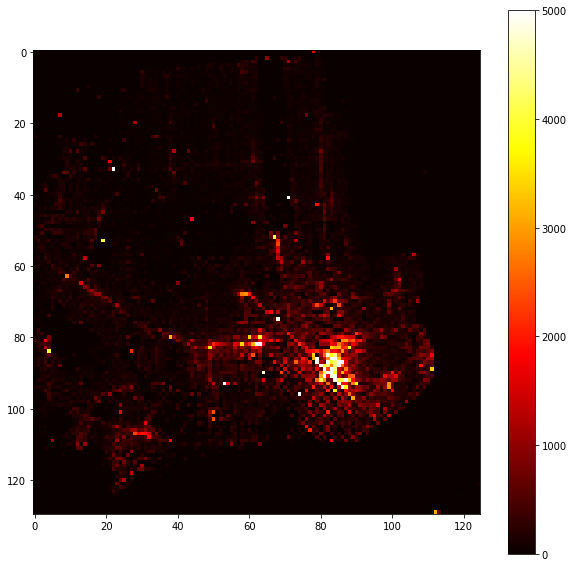

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=5000)
plt.colorbar()